Ten eerste willen we inzicht krijgen in de data dit doen we door met behulp van pandas de data in te laden uit de csv. Daarnaast is het handig om het pad naar de images direct op te slaan.

In [1]:
import pandas as pd
import os
import skimage
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bees_df = pd.read_csv('bee_data.csv')
bees_df.sample(100).head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
1439,005_430.png,7/7/18,12:56,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
2012,016_162.png,8/20/18,11:55,"San Jose, CA, USA",95124,-1,healthy,False,worker
2263,046_175.png,8/19/18,15:46,"Des Moines, IA, USA",50315,Carniolan honey bee,healthy,False,worker
1675,040_398.png,8/21/18,15:56,"Athens, GA, USA",30607,Italian honey bee,"few varrao, hive beetles",False,worker
2905,010_621.png,8/19/18,12:46,"Des Moines, IA, USA",50315,Carniolan honey bee,healthy,False,worker


In [3]:
IMG_PATH = "./bee_imgs/bee_imgs/"

In [4]:
bees_df.shape

(5172, 9)

In [5]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(bees_df)

,Total,Percent
file,0,0.0
date,0,0.0
time,0,0.0
location,0,0.0
zip code,0,0.0
subspecies,0,0.0
health,0,0.0
pollen_carrying,0,0.0
caste,0,0.0


In [6]:
image_files = list(os.listdir(IMG_PATH))
print("Number of image files: {}".format(len(image_files)))

Number of image files: 5172


In [7]:
file_names = list(bees_df['file'])
print("Matching image names: {}".format(len(set(file_names).intersection(image_files))))

Matching image names: 5172


In [8]:
def read_image_sizes(file_name):
    image = skimage.io.imread(IMG_PATH + file_name)
    return list(image.shape)
print(read_image_sizes("001_043.png"))

[64, 68, 3]


In [9]:
# imagenames = bees_df.loc[:, "file"]
# for index, value in imagenames.items():
#     m = np.stack(bees_df['file'].apply(read_image_sizes))
#     df = pd.DataFrame(m,columns=['w','h','c'])
#     bees_df = pd.concat([bees_df, df], axis = 1, sort=False)

In [10]:
# Fixing random state for reproducibility
# np.random.seed(19680801)
# N = 50
# x = np.random.rand(N)
# y = np.random.rand(N)
# colors = np.random.rand(N)
# area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
# plt.scatter(x, y, s=area, c=colors, alpha=0.5)
# plt.show()

In [11]:
health = bees_df['health']
health_mask = health == "healthy"
healthy_bees_df = bees_df.loc[health_mask]
unhealthy_mask = health != "healthy"
unhealthy_bees_df = bees_df.loc[unhealthy_mask]

['-1' 'Italian honey bee' 'VSH Italian honey bee' 'Carniolan honey bee'
 'Russian honey bee' '1 Mixed local stock 2' 'Western honey bee']


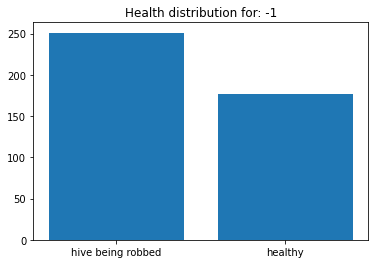

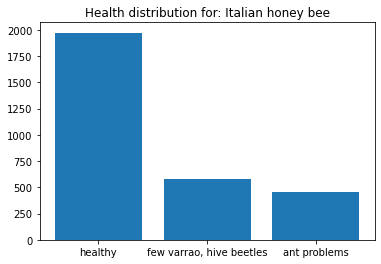

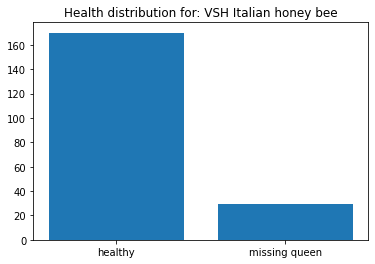

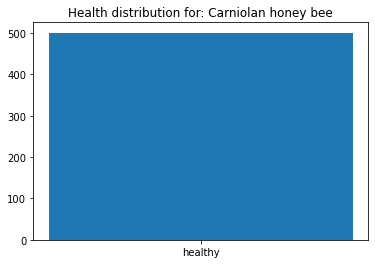

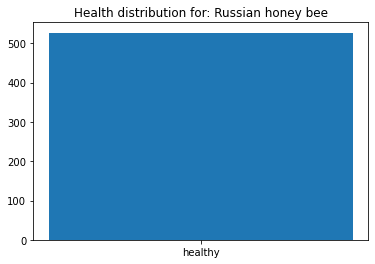

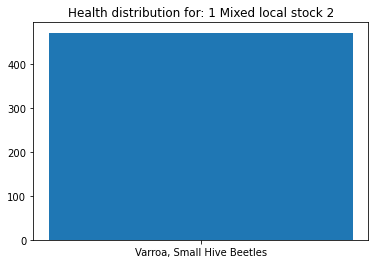

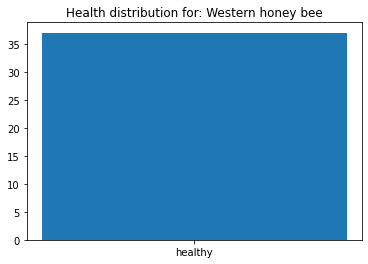

In [12]:
subspecies = bees_df.loc[:, 'subspecies']
names = subspecies.unique()
print(names)
for name in names:
    subspecies_mask = subspecies == name
    subspecies_bees_df = bees_df.loc[subspecies_mask]
    health_subspecies = subspecies_bees_df.loc[:,'health']
    subspecies_count = subspecies_bees_df['health'].value_counts()
    subspecies_count_df = pd.DataFrame(subspecies_count)
    healthdist_subspecies = subspecies_count_df.iloc[:,0]
    x = subspecies_count.index.values.tolist()
    y = healthdist_subspecies.values.tolist()
    # print("x= " + x)
    # print("y= " + y)
    plt.bar(x,y)
    plt.title("Health distribution for: " + name)
    plt.show()
    

In [13]:
health = bees_df.loc[:,'health']
hivebeetles1_mask = health == 'Varroa, Small Hive Beetles'
hivebeetles2_mask = health == 'few varrao, hive beetles'

hivebeetles = bees_df.loc[hivebeetles1_mask|hivebeetles2_mask]

bees_df['health'] = bees_df['health'].replace(['Varroa, Small Hive Beetles', 'few varrao, hive beetles'], 'Varroa, Hive Beetles')

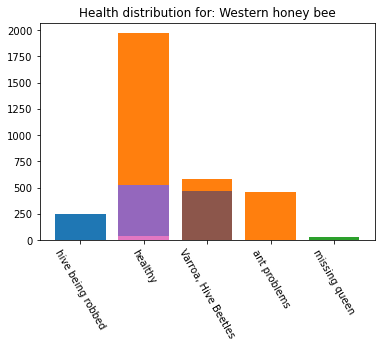

In [14]:
for name in names:
    subspecies_mask = subspecies == name
    subspecies_bees_df = bees_df.loc[subspecies_mask]
    health_subspecies = subspecies_bees_df.loc[:,'health']
    subspecies_count = subspecies_bees_df['health'].value_counts()
    subspecies_count_df = pd.DataFrame(subspecies_count)
    healthdist_subspecies = subspecies_count_df.iloc[:,0]
    x = subspecies_count.index.values.tolist()
    y = healthdist_subspecies.values.tolist()
    plt.bar(x,y)
    plt.title("Health distribution for: " + name)
    plt.xticks(rotation=300)
    # plt.show()
    

<BarContainer object of 5172 artists>

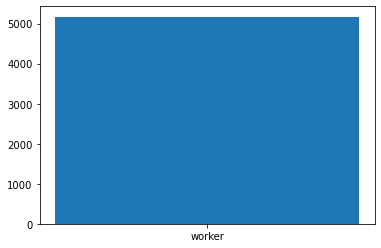

In [17]:
x = bees_df['caste']
y = bees_df['caste'].value_counts()
plt.bar(x,y)